# **Exercise 1: A ball dropped from a tower**


As the ball is dropped with 0 intial velocity, we can use the formula $T = \sqrt{2gh}$.

In [1]:
import numpy as np
g = 9.81
def time_of_flight(h):
  return np.sqrt(2*g*h)  

height = float(input("Enter the height in m: "))
print(f'The time of flight for the given height h = {height} m is {time_of_flight(height):.4f} sec')
print(f'The time of flight for the height h = 100 m is {time_of_flight(100):.4f} sec')


The time of flight for the given height h = 35.0 m is 26.2050 sec
The time of flight for the height h = 100 m is 44.2945 sec


# **Exercise 2: Altitude of a satellite**



## **2a**





Using $$\frac{GM_0m}{R^2} = \frac{mv^2}{R} \quad \text{     (Force balance)} \qquad \text{and     } v = \frac{2\pi R}{T}$$   
We get
$$R = \left( \frac{GM_0 T^2}{4\pi^2} \right)^{1/3}$$  
Thus the altitude is $h = R - R_0$ (where $R_0$ is radius of earth).

In [10]:
G = 6.6743e-11 # Gravitational Constant
R_0 = 6371000 # Radius of Earth
M_0 = 5.9722e+24 # Mass of earth
def height(time):
  R = np.cbrt((G*M_0*(time)**2)/(4*(np.pi)**2)) 
  return R - R_0
rev_time = float(input("Enter the Time period T in seconds: "))
print(f'For a satellite to have a time period T = {rev_time} sec or {rev_time/3600 :.2f} hr, it should be placed at an altitude of satellite is {height(rev_time):.1f}m or {height(rev_time)/1000:.1f} km')


For a satellite to have a time period T = 10000.0 sec or 2.78 hr, it should be placed at an altitude of satellite is 3661136.7m or 3661.1 km


## **2 b**



In [11]:
print(f'Altitude of Geosynchoronous satellite is {height(86400):.1f} m or  {height(86400)/1000:.1f} km')
print(f'Altitude of a satellite with Time period 90 min is {height(90*60):.1f} m or {height(90*60)/1000:.1f} km')
print(f'Altitude of a satellite with Time period 45 min is {height(45*60):.1f} m or  {height(45*60)/1000:.1f} km')

Altitude of Geosynchoronous satellite is 35870170.0 m or  35870.2 km
Altitude of a satellite with Time period 90 min is 281567.4 m or 281.6 km
Altitude of a satellite with Time period 45 min is -2180145.1 m or  -2180.1 km


### Reasoning for last part

The atlitude of last calculation came out to be nagative which is absurd. The reasoning for this is as follows- 
Note that the distance of satellite from the earth's centre decreases as T decreases as can be seen explcitly in the formula, $R = \left( \frac{GM T^2}{4\pi^2} \right)^{1/3}$  
Therefore altitude of Geosynchronous satellite with Time period 24hrs is much more than that of a satellite with period 90 min.  
But as we decrease T, at one point we hit $ R = R_0$ or h = 0 and so can't decrease T further as it is physically not possible for a satellite to orbit earth with $ R < R_0 $. This explains the third result in the last problem. Our equations give a value of $ R < R_0 $ and so the answer comes out be negative.
It short, it is not possible for a satellite orbiting Earth to have a time period of 45min. 

## **2c**

A geosynchronous satellite must match the Earth’s rotation relative to the distant stars, not the Sun.

Because the Earth orbits the Sun, it must rotate slightly more than $360^\circ$ each solar day to bring the Sun back to the same position in the sky. This can be easily understood by looking at the following figure. 

![Image](SiderealSolar.webp)

Source: [OpenStax Astronomy 2e – Section 4.3: Keeping Time](https://openstax.org/books/astronomy-2e/pages/4-3-keeping-time)

Because the Earth orbits the Sun, it must rotate slightly more than $360^\circ$ each solar day to bring the Sun back to the same position in the sky. 
The difference is approximately the time taken by earth to rotate $\frac{360}{365} ^\circ$ [As an year contains 365 days]
So we have the following definitions- 
- A **solar day** ($\approx 24\,\mathrm{h}$) is the time between successive noons.
- A **sidereal day** ($\approx 23.93\,\mathrm{h}$) is the time the Earth takes to rotate once relative to inertial space (fixed stars).

A geosynchronous orbit must have a period equal to the sidereal day; otherwise, the satellite will drift relative to the Earth’s surface.


In [12]:
print(f'The atlitude difference is {height(24*3600) - height(23.96*3600):.1f} m')

The atlitude difference is 46947.7 m


# **Exercise 3**


We use the formulae-  
$ r = \sqrt{x^2+y^2} $ and $ \theta = \tan^{-1}{\frac{y}{x}}$

In [17]:
def polar(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return r, theta

x = float(input("Enter x coordinate: "))
y = float(input("Enter y coordinate: "))
r, theta = polar(x,y)
print(f'For the cartesian coordinates ({x}, {y}), the polar coordinates are r = {r:.3f} and θ = {180 * theta /np.pi:.3f} degrees')

For the cartesian coordinates (3.0, 4.0), the polar coordinates are r = 5.000 and θ = 53.130 degrees


# **Exercise 4**

(a) $t_{\text{Earth}} = \frac{x}{v}$ , as both x and v are measured in earth's frame  
(b) The earth's frame will be time dilated wrt to the Ship's own frame. So we get,
$t_{\text{ship}} = \frac{t_{\text{Earth}}}{\gamma}$ where $\gamma = \frac{1}{\sqrt{1-v^2}}$

In [18]:
distance = float(input(" Enter the distance x in light years: "))
beta = float(input(" Enter the velocity as a fraction of c: "))
def gamma(beta):
    return 1/np.sqrt(1 - beta**2)

def tEarth(distance, beta):
    return distance/beta

def tShip(distance, beta):
    return distance/(beta*gamma(beta))
print(f'For a distance of {distance} light years and v  = {beta}c, Time taken according to Earth frame is {tEarth(float(distance), float(beta)):.6f} years and Ship frame is {tShip(float(distance), float(beta)):.6f}years')
print(f'For a distance of 10 light years and v  = 0.99c, Time taken according to Earth frame is {tEarth(10, 0.99):.6f} years and Ship frame is {tShip(10, 0.99):.6f} years')

For a distance of 10.0 light years and v  = 0.5c, Time taken according to Earth frame is 20.000000 years and Ship frame is 17.320508years
For a distance of 10 light years and v  = 0.99c, Time taken according to Earth frame is 10.101010 years and Ship frame is 1.424923 years


# **Exercise 5: Quantum potential step**


![image2](Q5deriv.jpeg)

In [24]:
def coefficients(E,V):
    rootE = np.sqrt(E)
    rootD = np.sqrt(E-V)
    r = (rootE - rootD)**2 / (rootE + rootD)**2
    t = 4*rootE*rootD/(rootE + rootD)**2
    return r,t

trans, ref = coefficients(10,9)
print(f'For the given values, the transimission probability is {trans:.6f} while the reflection probability is {ref:.6f}')

For the given values, the transimission probability is 0.269874 while the reflection probability is 0.730126


# **Exercise 6: Catalan numbers**


In [26]:
Catalan = [1.0]

while Catalan[-1] < 1e9:
    n = len(Catalan) - 1
    Catalan.append(Catalan[-1] * (4*n + 2) / (n + 2))

print(Catalan)


[1.0, 1.0, 2.0, 5.0, 14.0, 42.0, 132.0, 429.0, 1430.0, 4862.0, 16796.0, 58786.0, 208012.0, 742900.0, 2674440.0, 9694845.0, 35357670.0, 129644790.0, 477638700.0, 1767263190.0]


# **Exercise 7: The Madelung constant**


In [28]:
def madelung_constant(L):
    M = 0

    for i in range(-L, L+1):
        for j in range(-L, L+1):
            for k in range(-L, L+1):

                # exclude the origin
                if i == 0 and j == 0 and k == 0:
                    continue

                r = np.sqrt(i**2 + j**2 + k**2)
                sign = (-1)**(i+j+k)
                M += sign / r
    return M


L = 100
M = madelung_constant(L)

print(f" For L = {L}, Madelung constant = {M}")


 For L = 100, Madelung constant = -1.7418198158396654


# **Exercise 8:  The semi-empirical mass formula**

## **8a**

In [31]:
a1 = 15.67
a2 = 17.23
a3 = 0.75
a4 = 93.2

A = float(input('Enter the mass number A: '))
Z = float(input('Enter the atomic number Z: '))

def a_5(A,Z):
    value = 0
    if A % 2 ==0 and Z % 2 ==0:
        value = 12.0
    elif A % 2 ==0 and Z % 2 ==1:
        value = -12.0

    return value

def binding_energy(A,Z):
    BE = (a1*A - a2*(A**(2/3)) - a3*(Z**2)/(A**(1/3)) - a4*((A - 2*Z)**2)/A + a_5(A,Z)/(A**(1/2)))
    return BE

print(f'Binding energy for A = {A} and Z = {Z} is {binding_energy(A,Z):.4f} MeV')
print(f'Binding energy for A = 58 and Z = 28 is {binding_energy(58,28):.4f} MeV')

Binding energy for A = 40.0 and Z = 20.0 is 339.4535 MeV
Binding energy for A = 58 and Z = 28 is 493.9356 MeV


## **8b**

In [32]:
def Binding_energy_per_nucleon(A,Z):
    return binding_energy(A,Z)/A
print(f'Binding energy for A = {A} and Z = {Z} is {Binding_energy_per_nucleon(A,Z):.4f} MeV')
print(f'Binding energy per nucleon for A = 58 and Z = 28 is {Binding_energy_per_nucleon(58,28):.4f} MeV')

Binding energy for A = 40.0 and Z = 20.0 is 8.4863 MeV
Binding energy per nucleon for A = 58 and Z = 28 is 8.5161 MeV


## **8c**

In [33]:
def stable_nucleus(Z):
    BE_list = []
    for A in range(Z, 3*Z + 1):
        BE = Binding_energy_per_nucleon(A, Z)
        BE_list.append((A, BE))
    A_stable, BE_stable = max(BE_list, key=lambda x: x[1])
    return A_stable, BE_stable


Z_start = int(input("Enter the start value of atomic number Z: "))
A_stable, BE_stable = stable_nucleus(Z_start)
print(f'The most stable nucleus for Z = {Z_start} is A = {A_stable} with binding energy per nucleon = {BE_stable:.5f} MeV') 



The most stable nucleus for Z = 5 is A = 10 with binding energy per nucleon = 6.42277 MeV


## **8d**

          0        1         2        3         4         5         6   \
Z   1.000000  2.00000  3.000000  4.00000  5.000000  6.000000  7.000000   
BE -2.545738  5.84331  4.752358  6.83533  6.422771  7.450001  7.275929   

          7         8          9   ...         90         91       92  \
Z   8.000000  9.000000  10.000000  ...  91.000000  92.000000  93.0000   
BE  7.829219  7.756546   8.075066  ...   6.824878   6.798028   6.7637   

           93         94         95         96        97         98  \
Z   94.000000  95.000000  96.000000  97.000000  98.00000  99.000000   
BE   6.737957   6.702145   6.677448   6.641488   6.61655   6.581885   

            99  
Z   100.000000  
BE    6.555307  

[2 rows x 100 columns]


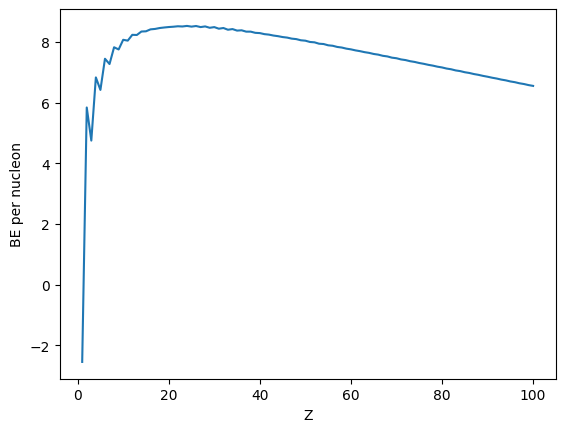


The nucleus with highest binding energy per nucleon is Z = 24, A = 50 with binding energy per nucleon = 8.5326 MeV


In [51]:
BE_values= []
for Z in range(1, 101):
    A_stable, BE_stable = stable_nucleus(Z)
    BE_values.append((Z, A_stable, BE_stable))
import matplotlib.pyplot as plt
import pandas as pd


Z_vals = [x[0] for x in BE_values]
A_vals = [x[1] for x in BE_values]
BE_vals = [x[2] for x in BE_values]

df = pd.DataFrame([Z_vals, BE_vals], index=["Z", "BE"])
print(df)

plt.figure()
plt.plot(Z_vals,BE_vals)
plt.xlabel('Z')
plt.ylabel('BE per nucleon')
plt.show()


Z_max, A_max, BE_max = max(BE_values, key=lambda x: x[2])

print(f'\nThe nucleus with highest binding energy per nucleon is Z = {Z_max}, A = {A_max} with binding energy per nucleon = {BE_max:.4f} MeV')


# **Exercise 9: Binomial coefficients**

## **9a**

In [56]:
def factorial (n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def binomial(n,k):
    if k == 0:
        return 1
    elif k > n:
        return 0
    else:
        return factorial(n) // (factorial(k) * factorial(n - k))

## **9b**

In [55]:
for n in range(1,21):
    row = [str(binomial(n, k)) for k in range(n + 1)] #Converted into string for joining
    print(" ".join(row)) # joined with space in between


1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


## **9c**

In [57]:
def probability_heads(n,k):
    p = binomial(n,k) / (2)**n
    return p

print(f'Probability of getting 60 heads in 100 tosses is {probability_heads(100,60):.6f}')

prob60 = 0
for k in range(60,101):
    prob60 += probability_heads(100,k)
print(f'Probability of getting atleast 60 heads in 100 tosses is {prob60:.6f}')

Probability of getting 60 heads in 100 tosses is 0.010844
Probability of getting atleast 60 heads in 100 tosses is 0.028444


# **Exercise 10: Plotting experimental data**

## **10a**

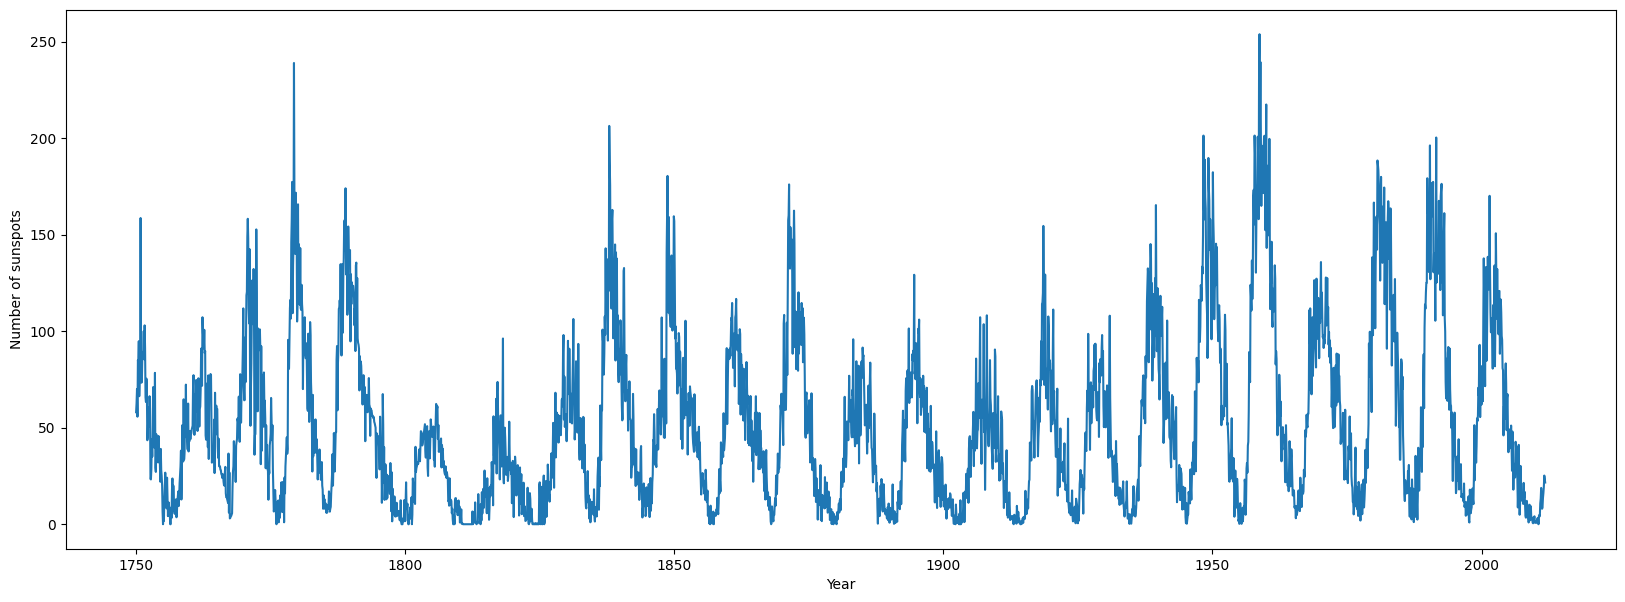

In [83]:

df = pd.read_csv('sunspots.txt', sep='\t', header = None, names=['Months', 'Sunspots'])
plt.figure(figsize= (20,7))
plt.plot(df['Months']/12+1750, df['Sunspots'])
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.show()

## **10b**

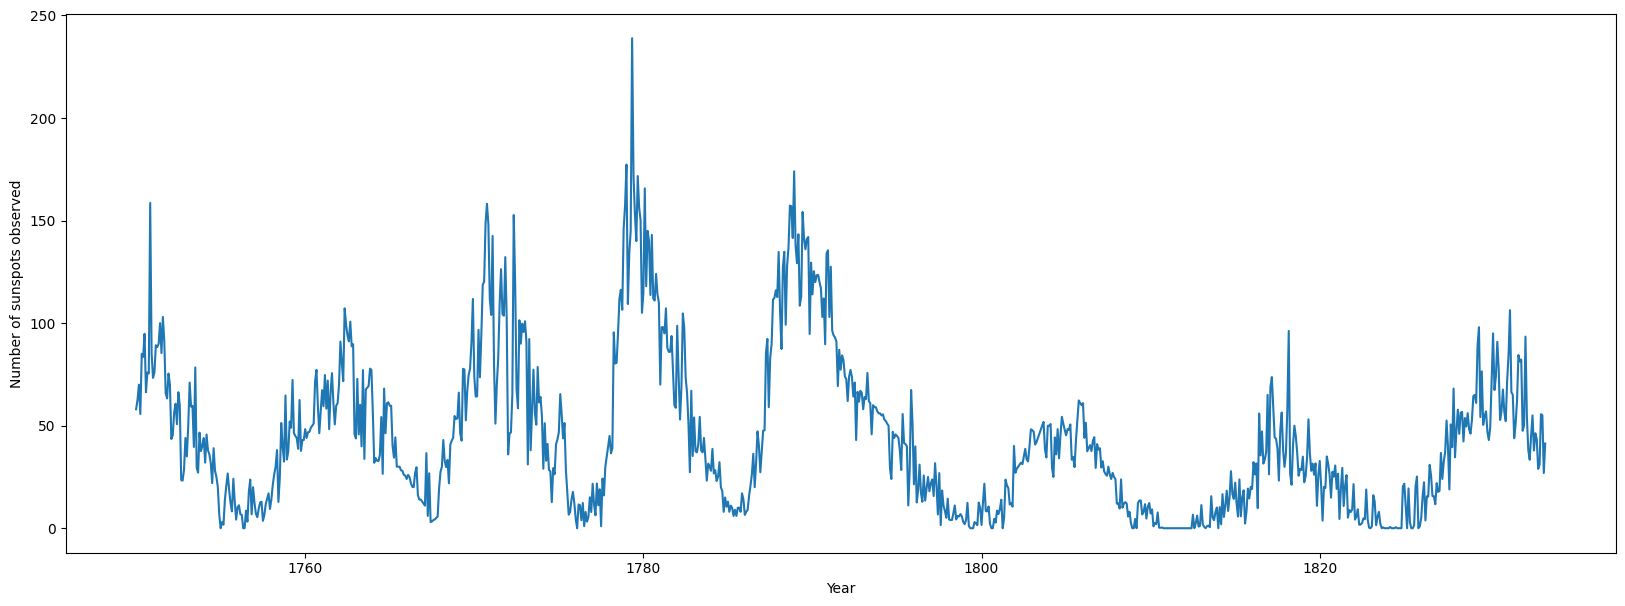

In [84]:
months1000 = df['Months'][:1001]
sunspots1000 = df['Sunspots'][:1001]

plt.figure(figsize=(20,7))
plt.plot(months1000/12 + 1750,sunspots1000)
plt.xlabel('Year')
plt.ylabel('Number of sunspots observed')
plt.show()

## **10c**

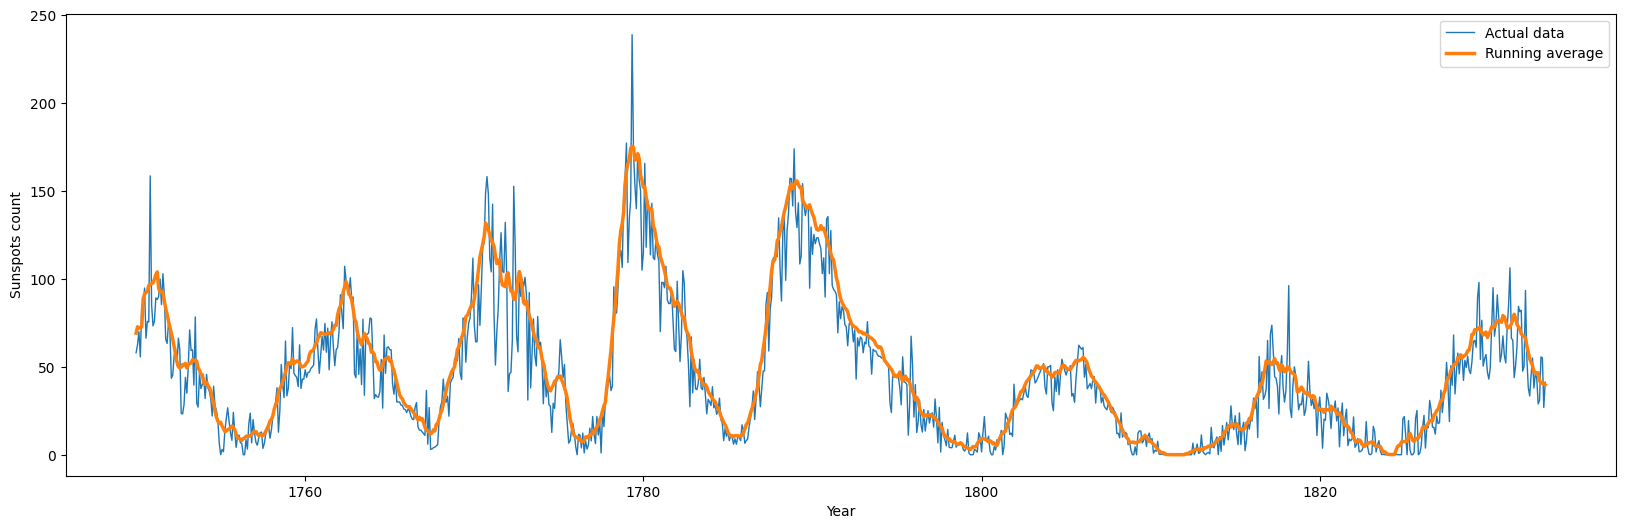

In [107]:
def Run_avg(k,r,list):
    n = len(list)
    if k > n:
        return None
    elif k >= r and k <= n-r:
        list1 = list[k-r:k+r+1]
        return sum(list1)/(2*r)
    elif k <r: 
        list2 = list[:k+r+1]
        length2 = len(list2)
        return sum(list2)/length2
    else:  
        list3 = list[k-r:]
        length3 = len(list3)
        return sum(list3)/length3


avg_spots = []
for i in range(0,1001):
    avg_spots.append(Run_avg(i,5,sunspots1000))
plt.figure(figsize=(20,6))
plt.plot(months1000/12+1750,sunspots1000, lw =1, label = 'Actual data')
plt.plot(months1000/12+1750,avg_spots, lw =2.5, label = 'Running average')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sunspots count')
plt.show()


# **Exercise 11: Curve plotting**

## **11a**

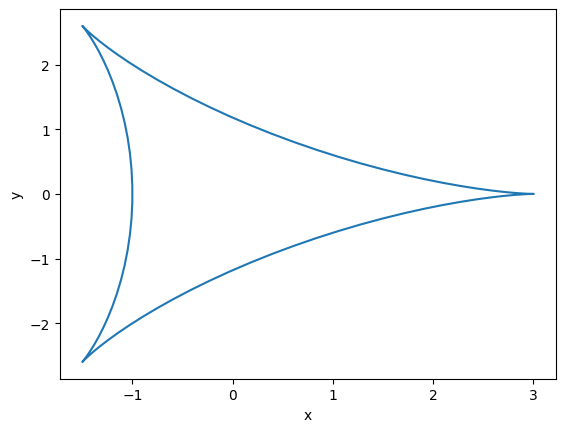

In [108]:
theta = np.linspace(0, 2*np.pi, 100)
x = 2*np.cos(theta)+np.cos(2*theta)
y = 2*np.sin(theta)-np.sin(2*theta)
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

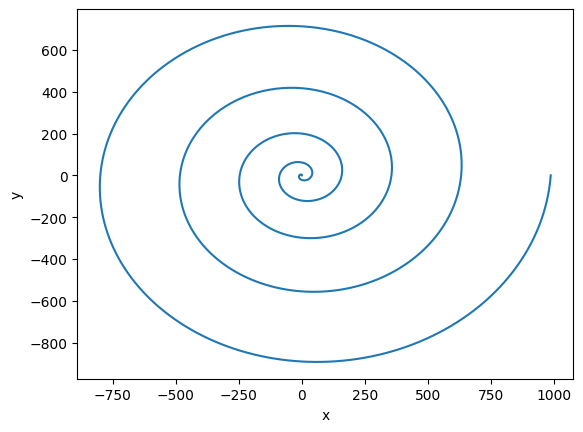

In [109]:
theta = np.linspace(0, 10*np.pi, 1000)
r = theta**2
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

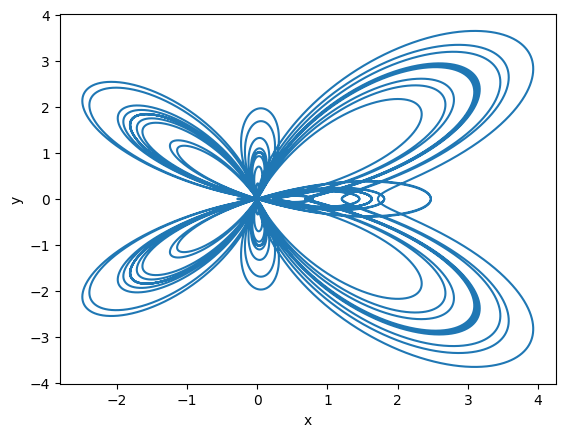

In [110]:
theta = np.linspace(0, 24*np.pi, 100000)
r = np.e**(np.cos(theta)) - 2*np.cos(4*theta) + (np.sin(theta/12))**5
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **Exercise 12: Deterministic chaos and the Feigenbaum plot**

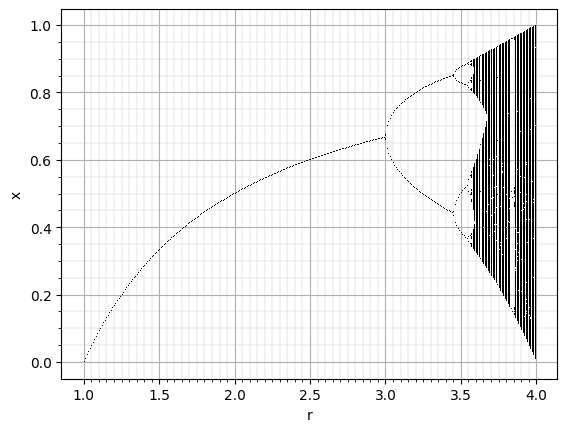

In [148]:
def x_new(r,x):
    return r*x *(1-x)

def x_vals(r,x):
    x_array = []
    for i in range(1,3001):
        x = x_new(r,x)
        if i > 1000:
            x_array.append(x)
    return x_array
plt.figure()
i_values = np.arange(1, 4.00, 0.01)
for i in i_values:
    x = x_vals(i, 0.5)
    plt.plot([i]*len(x), x, ',k')

plt.gca().set_xticks(np.arange(1, 4.05, 0.05), minor=True)
plt.gca().set_yticks(np.arange(0, 1.05, 0.05), minor=True)
plt.xlabel('r')
plt.ylabel('x')
plt.grid()
plt.grid(which='minor', linewidth=0.3, alpha=0.7)

plt.show()

## **12a**

For a given value of r -  
A **fixed point** will have a single value of x  
A **limit cycle** will have finite number of values for x  
In case of **Chaos** there will infinite values of x for each r. (i.e. we will see a dense continuous band on the plot)


## **12b**

From the graph we see that the onset of chaos occurs at a value between 3.55 and 3.60 i.e. at r ~ 3.57


